# 导入数据（波士顿）

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

In [3]:
boston = load_boston()

In [4]:
boston.data.shape

(506, 13)

In [5]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
boston_dataframe = pd.DataFrame(boston.data,columns=boston.feature_names)

In [7]:
boston_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
X = boston.data
y = boston.target

# 训练模型

In [64]:
from sklearn.linear_model import LinearRegression
import time
from sklearn.model_selection import train_test_split

In [10]:
linearregression = LinearRegression()

In [66]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [67]:
start = time.perf_counter()
linearregression.fit(X_train,y_train)
print('elaspe:{0:.6f}'.format(time.perf_counter()-start))

elaspe:0.003742


In [69]:
score_train = linearregression.score(X_train,y_train)
score_test = linearregression.score(X_test,y_test)
print(score_train,score_test)

0.735802383930779 0.733681666570743


# 模型优化（归一化，增加多项式）

In [13]:
linearregression = LinearRegression(normalize=True)

In [49]:
start = time.perf_counter()
linearregression.fit(X,y)
print('elaspe:{0:.6f}'.format(time.perf_counter()-start))
linearregression.score(X,y)

elaspe:0.003078


0.7406426641094095

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [56]:
def model(degree=2):
    linearregression = LinearRegression(normalize=True)
    polynomialfeature = PolynomialFeatures(degree)
    clf = Pipeline([('polynomialfeature',polynomialfeature),('linearregression',linearregression)])
    return clf

In [57]:
degrees = [1,2,3,4,5]
for i in range(len(degrees)):
    model1 = model(degrees[i])
    start = time.perf_counter()
    model1.fit(X,y)
    print('elaspe:{0:.6f}'.format(time.perf_counter()-start))
    score1 = model1.score(X,y)
    print(degrees[i],score1)

elaspe:0.003953
1 0.7406426641094095
elaspe:0.010790
2 0.917531248975974
elaspe:0.103971
3 0.9980117506881533
elaspe:0.297536
4 1.0
elaspe:0.738520
5 1.0


# 学习曲线

In [58]:
from common.utils import plot_learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

<module 'matplotlib.pyplot' from 'd:\\3_software\\4_profession\\python3.7\\lib\\site-packages\\matplotlib\\pyplot.py'>

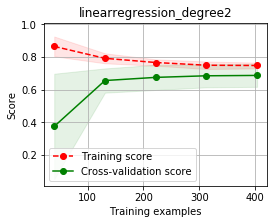

In [63]:
model2 = model(1)
cv = ShuffleSplit(n_splits=10, test_size=0.2,random_state=0)
cv2 = KFold(n_splits=5,shuffle=True,random_state=5)
plt.figure(figsize=(4,3))
plot_learning_curve(plt, model2, 'linearregression_degree2', X, y, ylim=[0.01,1.01], cv=cv)